In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns



In [3]:
df = pd.read_csv('./age.csv', encoding='utf-8')
df

,年月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣]
0,201401,10007000,衣,2,未滿20歲,282,574794
1,201401,10007000,衣,2,20(含)-25歲,7091,16563668
2,201401,10007000,衣,2,25(含)-30歲,20467,52197577
3,201401,10007000,衣,2,30(含)-35歲,35400,93635594
4,201401,10007000,衣,2,35(含)-40歲,41102,113811652
...,...,...,...,...,...,...,...
500187,202308,67000000,其他,1,60(含)-65歲,5961,29661357
500188,202308,67000000,其他,1,65(含)-70歲,3808,21203594
500189,202308,67000000,其他,1,70(含)-75歲,2213,12924404
500190,202308,67000000,其他,1,75(含)-80歲,680,4171218


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500192 entries, 0 to 500191
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   年月            500192 non-null  int64 
 1   地區            500192 non-null  int64 
 2   產業別           500192 non-null  object
 3   性別            500192 non-null  int64 
 4   年齡層           500192 non-null  object
 5   信用卡交易筆數       500192 non-null  int64 
 6   信用卡交易金額[新台幣]  500192 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 26.7+ MB


In [5]:
df.describe(include='all')

,年月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣]
count,500192.000000,5.001920e+05,500192,500192.0,500192,5.001920e+05,5.001920e+05
unique,NaN,NaN,7,NaN,14,NaN,NaN
top,NaN,NaN,衣,NaN,未滿20歲,NaN,NaN
freq,NaN,NaN,71456,NaN,35728,NaN,NaN
mean,201840.844828,2.505386e+07,NaN,1.5,NaN,2.222383e+04,4.447021e+07
std,279.293278,2.478577e+07,NaN,0.5,NaN,1.270565e+05,2.986701e+08
min,201401.000000,9.007000e+06,NaN,1.0,NaN,-7.000000e+00,-9.275543e+07
25%,201605.750000,1.000700e+07,NaN,1.0,NaN,1.880000e+02,4.370198e+05
50%,201810.500000,1.001450e+07,NaN,1.5,NaN,1.344000e+03,3.253022e+06
75%,202103.250000,6.300000e+07,NaN,2.0,NaN,6.842000e+03,1.426566e+07


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500192 entries, 0 to 500191
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   年月            500192 non-null  int64 
 1   地區            500192 non-null  int64 
 2   產業別           500192 non-null  object
 3   性別            500192 non-null  int64 
 4   年齡層           500192 non-null  object
 5   信用卡交易筆數       500192 non-null  int64 
 6   信用卡交易金額[新台幣]  500192 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 26.7+ MB


In [7]:
#檢視資料是否重覆
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
500187    False
500188    False
500189    False
500190    False
500191    False
Length: 500192, dtype: bool

觀察下載之檔案資料共有500192 rows × 7 columns,"年月"、"地區"、"性別"資料型態為int64，
為資料呈現時便利性，將以下變更:
-1.年、月分別以個欄位呈現
-2.地區依資料來源單位提供之對應地區呈現
-3.性別改以文字呈現
修正後之資料另儲存為age_trans.csv

In [6]:

df = pd.read_csv('../six_cities.csv')
df = df[(df["產業別"] != "其他")]
df

,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣]
0,2014,1,臺北市,食,女性,未滿20歲,2819,2615745
1,2014,1,臺北市,食,女性,20(含)-25歲,66270,66794381
2,2014,1,臺北市,食,女性,25(含)-30歲,227091,263753101
3,2014,1,臺北市,食,女性,30(含)-35歲,396113,490378285
4,2014,1,臺北市,食,女性,35(含)-40歲,498370,618092602
...,...,...,...,...,...,...,...,...
137587,2023,9,高雄市,行,男性,60(含)-65歲,50439,109126842
137588,2023,9,高雄市,行,男性,65(含)-70歲,31387,57677827
137589,2023,9,高雄市,行,男性,70(含)-75歲,16872,32315853
137590,2023,9,高雄市,行,男性,75(含)-80歲,4559,10076219


In [7]:
df.describe(include='all')

,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣]
count,117936.000000,117936.000000,117936,117936,117936,117936,1.179360e+05,1.179360e+05
unique,NaN,NaN,6,6,2,14,NaN,NaN
top,NaN,NaN,臺北市,食,女性,未滿20歲,NaN,NaN
freq,NaN,NaN,19656,19656,58968,8424,NaN,NaN
mean,2018.384615,6.384615,NaN,NaN,NaN,NaN,6.476480e+04,9.726556e+07
std,2.815859,3.416531,NaN,NaN,NaN,NaN,2.068347e+05,2.064373e+08
min,2014.000000,1.000000,NaN,NaN,NaN,NaN,1.000000e+01,-3.058050e+05
25%,2016.000000,3.000000,NaN,NaN,NaN,NaN,2.686000e+03,6.571957e+06
50%,2018.000000,6.000000,NaN,NaN,NaN,NaN,1.389450e+04,3.660379e+07
75%,2021.000000,9.000000,NaN,NaN,NaN,NaN,4.763075e+04,9.577251e+07


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117936 entries, 0 to 137591
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   年             117936 non-null  int64 
 1   月             117936 non-null  int64 
 2   地區            117936 non-null  object
 3   產業別           117936 non-null  object
 4   性別            117936 non-null  object
 5   年齡層           117936 non-null  object
 6   信用卡交易筆數       117936 non-null  int64 
 7   信用卡交易金額[新台幣]  117936 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 8.1+ MB


In [9]:
df.describe(include='all')

,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣]
count,117936.000000,117936.000000,117936,117936,117936,117936,1.179360e+05,1.179360e+05
unique,NaN,NaN,6,6,2,14,NaN,NaN
top,NaN,NaN,臺北市,食,女性,未滿20歲,NaN,NaN
freq,NaN,NaN,19656,19656,58968,8424,NaN,NaN
mean,2018.384615,6.384615,NaN,NaN,NaN,NaN,6.476480e+04,9.726556e+07
std,2.815859,3.416531,NaN,NaN,NaN,NaN,2.068347e+05,2.064373e+08
min,2014.000000,1.000000,NaN,NaN,NaN,NaN,1.000000e+01,-3.058050e+05
25%,2016.000000,3.000000,NaN,NaN,NaN,NaN,2.686000e+03,6.571957e+06
50%,2018.000000,6.000000,NaN,NaN,NaN,NaN,1.389450e+04,3.660379e+07
75%,2021.000000,9.000000,NaN,NaN,NaN,NaN,4.763075e+04,9.577251e+07


In [10]:
#檢視是有空值
df.isnull()

,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣]
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
137587,False,False,False,False,False,False,False,False
137588,False,False,False,False,False,False,False,False
137589,False,False,False,False,False,False,False,False
137590,False,False,False,False,False,False,False,False


In [11]:
df

,年,月,地區,產業別,性別,年齡層,信用卡交易筆數,信用卡交易金額[新台幣]
0,2014,1,臺北市,食,女性,未滿20歲,2819,2615745
1,2014,1,臺北市,食,女性,20(含)-25歲,66270,66794381
2,2014,1,臺北市,食,女性,25(含)-30歲,227091,263753101
3,2014,1,臺北市,食,女性,30(含)-35歲,396113,490378285
4,2014,1,臺北市,食,女性,35(含)-40歲,498370,618092602
...,...,...,...,...,...,...,...,...
137587,2023,9,高雄市,行,男性,60(含)-65歲,50439,109126842
137588,2023,9,高雄市,行,男性,65(含)-70歲,31387,57677827
137589,2023,9,高雄市,行,男性,70(含)-75歲,16872,32315853
137590,2023,9,高雄市,行,男性,75(含)-80歲,4559,10076219


In [13]:
matplotlib.rc('font', family='Microsoft JhengHei')
other  =df["產業別"] != '其他'
df_a = df [other]

df_a
df_a.to_csv('output.csv', index=False)

In [14]:
grouped_data = df_a.groupby(['年', '年齡層']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']

# 重新組織資料，使之符合你的格式
pivot_table_year = grouped_data.pivot_table(index='年齡層', columns='年', values='平均交易金額', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
pivot_table_year = pivot_table_year.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_year.reset_index(inplace=True)

# 顯示結果
print(pivot_table_year)

年         年齡層  2014  2015  2016  2017  2018  2019  2020  2021  2022  2023
0   20(含)-25歲  1686  1653  1495  1496  1388  1205   950   687   624   608
1   25(含)-30歲  1842  1794  1662  1670  1589  1423  1111   859   824   801
2   30(含)-35歲  1956  1870  1742  1794  1737  1569  1228   983   948   923
3   35(含)-40歲  2036  1933  1791  1870  1821  1653  1293  1092  1049  1013
4   40(含)-45歲  2174  2078  1923  2025  1997  1833  1411  1222  1161  1135
5   45(含)-50歲  2366  2252  2081  2203  2183  2051  1585  1403  1332  1330
6   50(含)-55歲  2505  2391  2206  2351  2333  2227  1709  1565  1525  1548
7   55(含)-60歲  2594  2480  2279  2439  2409  2326  1742  1645  1644  1708
8   60(含)-65歲  2599  2491  2286  2484  2477  2411  1759  1712  1739  1845
9   65(含)-70歲  2632  2536  2316  2497  2459  2427  1709  1689  1752  1910
10  70(含)-75歲  2682  2566  2365  2551  2521  2493  1751  1734  1784  1928
11  75(含)-80歲  2701  2603  2416  2564  2584  2571  1799  1761  1819  2015
12   80(含)歲以上  3117  3051  2794  2953 

In [15]:
pivot_table_year.columns

Index(['年齡層', 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype='object', name='年')

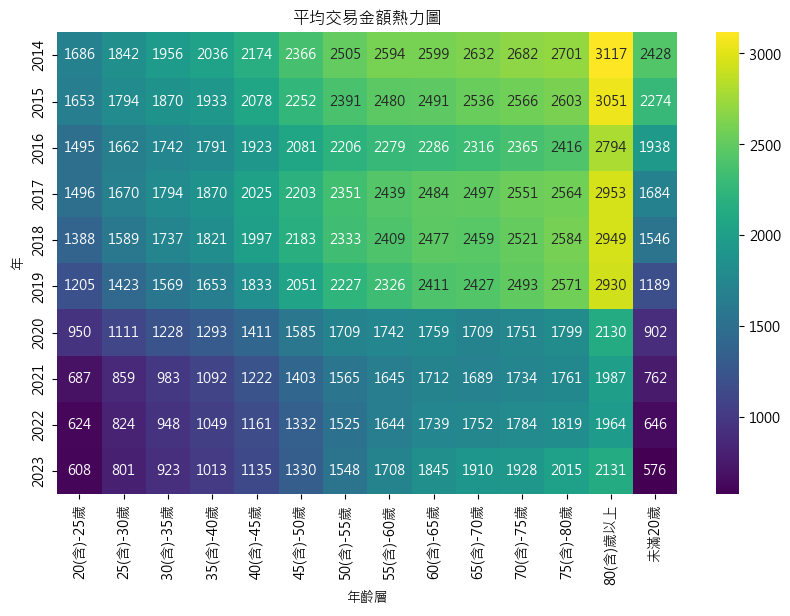

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_year.set_index('年齡層').T, cmap='viridis', annot=True, fmt=".0f")
plt.title('平均交易金額熱力圖')
plt.show()

In [80]:
grouped_data = df_a.groupby(['年齡層', '產業別']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']

# 重新組織資料，使之符合你的格式
pivot_table_industry = grouped_data.pivot_table(index='年齡層', columns='產業別', values='平均交易金額', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
pivot_table_industry = pivot_table_industry.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table_industry.reset_index(inplace=True)

# 顯示結果
print(pivot_table_industry)

產業別        年齡層     住  文教康樂    百貨     行     衣     食
0    20(含)-25歲  2198  1968  1260   592  1805   444
1    25(含)-30歲  2917  2320  1571   735  2114   578
2    30(含)-35歲  3468  2672  1733   845  2232   688
3    35(含)-40歲  3672  3021  1807   939  2267   768
4    40(含)-45歲  4009  3636  1830  1024  2417   837
5    45(含)-50歲  4496  4670  1974  1095  2704   958
6    50(含)-55歲  4828  5522  2141  1144  3055  1081
7    55(含)-60歲  5173  6013  2203  1175  3394  1195
8    60(含)-65歲  5407  6713  2211  1185  3574  1268
9    65(含)-70歲  5278  7247  2055  1149  3607  1263
10   70(含)-75歲  4985  7490  1941  1163  3782  1284
11   75(含)-80歲  5148  8289  2050  1158  3952  1314
12    80(含)歲以上  5935  7693  2232  1329  4201  1464
13       未滿20歲  2719  1939  1424   569  1591   367


In [78]:
grouped_data = df_a.groupby(['年齡層', '產業別']).agg({'信用卡交易金額[新台幣]': 'sum', '信用卡交易筆數': 'sum'}).reset_index()

# 計算 '平均交易金額'
grouped_data['平均交易金額'] = grouped_data['信用卡交易金額[新台幣]'] / grouped_data['信用卡交易筆數']

# 重新組織資料，使之符合你的格式
pivot_table = grouped_data.pivot_table(index='年齡層', columns=['產業別'], values='平均交易金額', aggfunc='mean')

# 將 '平均交易金額' 四捨五入並轉換為整數
pivot_table = pivot_table.round().astype(int)

# 將 '年齡層' 移到列(index)
pivot_table.reset_index(inplace=True)

# 顯示結果
print(pivot_table)

產業別        年齡層     住  文教康樂    百貨     行     衣     食
0    20(含)-25歲  2198  1968  1260   592  1805   444
1    25(含)-30歲  2917  2320  1571   735  2114   578
2    30(含)-35歲  3468  2672  1733   845  2232   688
3    35(含)-40歲  3672  3021  1807   939  2267   768
4    40(含)-45歲  4009  3636  1830  1024  2417   837
5    45(含)-50歲  4496  4670  1974  1095  2704   958
6    50(含)-55歲  4828  5522  2141  1144  3055  1081
7    55(含)-60歲  5173  6013  2203  1175  3394  1195
8    60(含)-65歲  5407  6713  2211  1185  3574  1268
9    65(含)-70歲  5278  7247  2055  1149  3607  1263
10   70(含)-75歲  4985  7490  1941  1163  3782  1284
11   75(含)-80歲  5148  8289  2050  1158  3952  1314
12    80(含)歲以上  5935  7693  2232  1329  4201  1464
13       未滿20歲  2719  1939  1424   569  1591   367


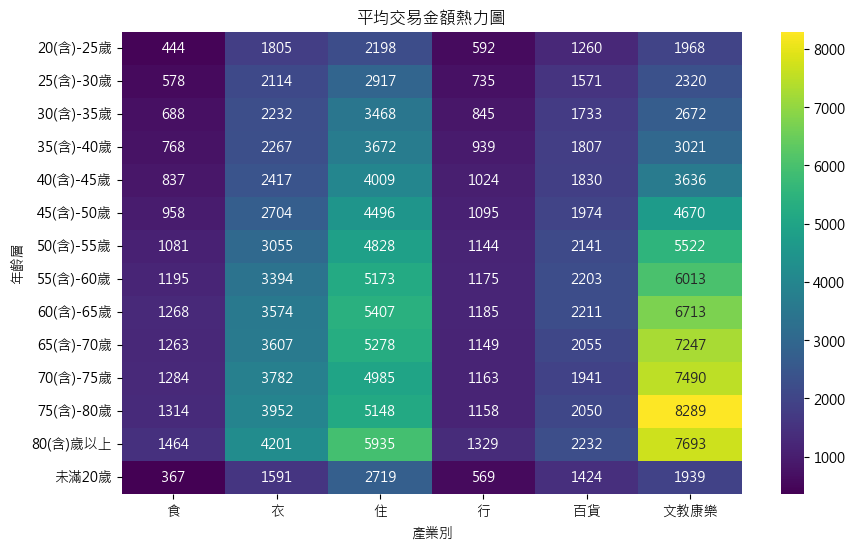

In [81]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_industry.set_index('年齡層')[['食', '衣', '住', '行', '百貨', '文教康樂']], cmap='viridis', annot=True, fmt=".0f")
plt.title('平均交易金額熱力圖')
plt.show()

              信用卡交易筆數  信用卡交易金額[新台幣]
信用卡交易筆數       1.00000       0.68617
信用卡交易金額[新台幣]  0.68617       1.00000


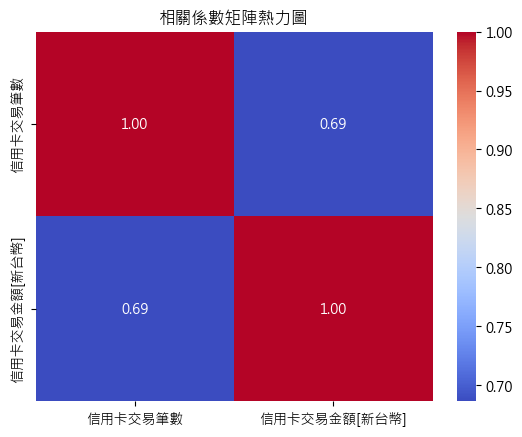

In [21]:
matplotlib.rc('font', family='Microsoft JhengHei')
selected_columns = ['信用卡交易筆數', '信用卡交易金額[新台幣]']
selected_data = df[selected_columns]
correlation_matrix = selected_data.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('相關係數矩陣熱力圖')
plt.show()

In [15]:
print(df['平均交易金額'])
print(df_a['平均交易金額'])


KeyError: '平均交易金額'

In [49]:
selected_columns = ['年齡層', '產業別', '平均交易金額']

# 過濾原始資料
selected_data = df_a[selected_columns]

# 使用 pivot_table 將資料進行重塑，並重設索引
pivot_table = selected_data.pivot_table(index='年齡層', columns='產業別', values='平均交易金額', aggfunc='mean').reset_index()

# 顯示結果
print(pivot_table)

產業別        年齡層            住         文教康樂           百貨            行  \
0    20(含)-25歲  3425.990836          inf  1487.479076         -inf   
1    25(含)-30歲  4064.485769  2679.642317  1714.948690   911.779997   
2    30(含)-35歲  4495.904510  2841.779901  1769.267354  1026.702346   
3    35(含)-40歲  4614.847032  3031.540358  1818.848632  1117.002907   
4    40(含)-45歲  5024.088543  3554.514024  1929.873755  1179.685796   
5    45(含)-50歲          inf         -inf  2037.696628  1228.082373   
6    50(含)-55歲  5657.043348  4751.527105  2211.374190  1256.444428   
7    55(含)-60歲  5923.544378  5237.076450  2364.040104  1284.620090   
8    60(含)-65歲  6052.727157         -inf  2365.413728          inf   
9    65(含)-70歲  5920.390521          inf         -inf  1152.942616   
10   70(含)-75歲  5791.458013  6497.137243  2295.392207  1137.512198   
11   75(含)-80歲         -inf         -inf         -inf          inf   
12    80(含)歲以上  7519.913414         -inf          inf          inf   
13       未滿20歲      

In [ ]:

plt.rcParams['font.family'] = 'Microsoft JhengHei'

# 選擇需要的資料列
selected_columns = ['年齡層', '產業別', '平均交易金額']

# 過濾原始資料
selected_data = pivot_table[selected_columns]

# 使用熱力圖呈現平均交易金額
plt.figure(figsize=(12, 8))
correlation_matrix = selected_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('熱力圖 - 年齡和產業別的平均交易金額')
plt.xlabel('產業別')
plt.ylabel('年齡層')
plt.show()

In [40]:
matplotlib.rc('font', family='Microsoft JhengHei')
selected_columns = [df['年齡層'], df['平均交易金額']]
selected_data = df[selected_columns]
correlation_matrix = selected_data.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('相關係數矩陣熱力圖')
plt.show()

KeyError: "None of [Index([('未滿20歲', '20(含)-25歲', '25(含)-30歲', '30(含)-35歲', '35(含)-40歲', '40(含)-45歲', '45(含)-50歲', '50(含)-55歲', '55(含)-60歲', '60(含)-65歲', '65(含)-70歲', '70(含)-75歲', '75(含)-80歲', '80(含)歲以上', '未滿20歲', '20(含)-25歲', '25(含)-30歲', '30(含)-35歲', '35(含)-40歲', '40(含)-45歲', '45(含)-50歲', '50(含)-55歲', '55(含)-60歲', '60(含)-65歲', '65(含)-70歲', '70(含)-75歲', '75(含)-80歲', '80(含)歲以上', '未滿20歲', '20(含)-25歲', '25(含)-30歲', '30(含)-35歲', '35(含)-40歲', '40(含)-45歲', '45(含)-50歲', '50(含)-55歲', '55(含)-60歲', '60(含)-65歲', '65(含)-70歲', '70(含)-75歲', '75(含)-80歲', '80(含)歲以上', '未滿20歲', '20(含)-25歲', '25(含)-30歲', '30(含)-35歲', '35(含)-40歲', '40(含)-45歲', '45(含)-50歲', '50(含)-55歲', '55(含)-60歲', '60(含)-65歲', '65(含)-70歲', '70(含)-75歲', '75(含)-80歲', '80(含)歲以上', '未滿20歲', '20(含)-25歲', '25(含)-30歲', '30(含)-35歲', '35(含)-40歲', '40(含)-45歲', '45(含)-50歲', '50(含)-55歲', '55(含)-60歲', '60(含)-65歲', '65(含)-70歲', '70(含)-75歲', '75(含)-80歲', '80(含)歲以上', '未滿20歲', '20(含)-25歲', '25(含)-30歲', '30(含)-35歲', '35(含)-40歲', '40(含)-45歲', '45(含)-50歲', '50(含)-55歲', '55(含)-60歲', '60(含)-65歲', '65(含)-70歲', '70(含)-75歲', '75(含)-80歲', '80(含)歲以上', '未滿20歲', '20(含)-25歲', '25(含)-30歲', '30(含)-35歲', '35(含)-40歲', '40(含)-45歲', '45(含)-50歲', '50(含)-55歲', '55(含)-60歲', '60(含)-65歲', '65(含)-70歲', '70(含)-75歲', '75(含)-80歲', '80(含)歲以上', '未滿20歲', '20(含)-25歲', ...), (2038.276595744681, 2335.8719503596108, 2550.3286754287387, 2645.073276836158, 2769.0052065592913, 2942.9148605178507, 3334.210874806578, 3940.1036468330135, 4286.992319708409, 4426.653902367729, 4437.32101910828, 5078.527777777777, 3109.7719298245615, 4273.387179487179, 1859.4518828451883, 2217.497101178231, 2420.028453816711, 2429.4802440951794, 2494.0135151393624, 2641.95495291561, 3083.8286768881317, 3585.214221824687, 3895.1167322130855, 4241.911880409127, 3667.2938311688313, 3825.0833333333335, 4241.80701754386, 3358.3534136546186, 1815.8070175438597, 2073.9177440206854, 2338.1428657218353, 2387.344505293903, 2494.706126760563, 2698.8987456302693, 3147.8093857388317, 3626.47157161515, 4099.06716534206, 4009.086926286509, 3596.399416909621, 3602.9468599033817, 2817.4, 3806.2663934426228, 1661.8215767634854, 2016.6733803289694, 2302.3321347464043, 2411.909319050116, 2508.2897670070474, 2648.8395805347313, 3155.2463062650327, 3660.3488050198393, 4151.508439897698, 4025.035500747384, 4108.239416058394, 4241.021621621621, 3235.0731707317073, 4114.367924528302, 1728.2090163934427, 1995.7240324307786, 2335.5981942641333, 2370.1632616868837, 2538.7385749896134, 2685.230212836714, 3178.125245553491, 3712.4978389344624, 4108.365983674829, 4291.344424131627, 3694.1473214285716, 4236.60294117647, 5015.096153846154, 4057.975265017668, 1885.0916666666667, 1903.2935507783543, 2170.305874174487, 2265.5930385288966, 2478.184228462377, 2658.2467236018733, 2975.4017102565385, 3484.545286351022, 3994.3587896253603, 4318.375191424196, 3485.3601147776185, 4194.0918918918915, 5612.984615384616, 3560.4744525547444, 1635.5283687943263, 1856.9714782105111, 2065.0329941250525, 2146.33201000834, 2291.828932367894, 2435.118679086707, 2796.3786799300983, 3162.5158024882157, 3485.949732302201, 3572.004099760847, 3443.921151439299, 3224.675105485232, 6125.258620689655, 3026.2111436950145, 1712.4816053511706, 1870.5117868600921, ...)], dtype='object')] are in the [columns]"

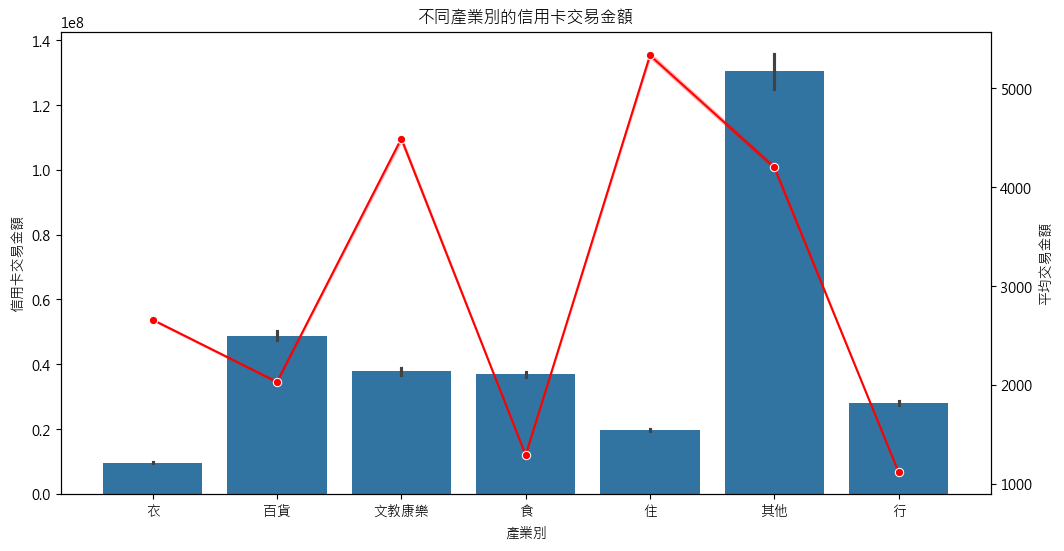

In [17]:
#依產業別分析
matplotlib.rc('font', family='Microsoft JhengHei')
df['平均交易金額'] = df['信用卡交易金額[新台幣]'] / df['信用卡交易筆數']
plt.figure(figsize=(12, 6))
sns.barplot(x='產業別', y='信用卡交易金額[新台幣]', data=df)
plt.title('不同產業別的信用卡交易金額')
plt.xlabel('產業別')
plt.ylabel('信用卡交易金額')

ax2 = plt.twinx()
sns.lineplot(x='產業別', y='平均交易金額', data=df, color='red', marker='o', ax=ax2)
ax2.set_ylabel('平均交易金額')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_21064\3117670455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['平均交易金額'] = df_a['信用卡交易金額[新台幣]'] / df_a['信用卡交易筆數']


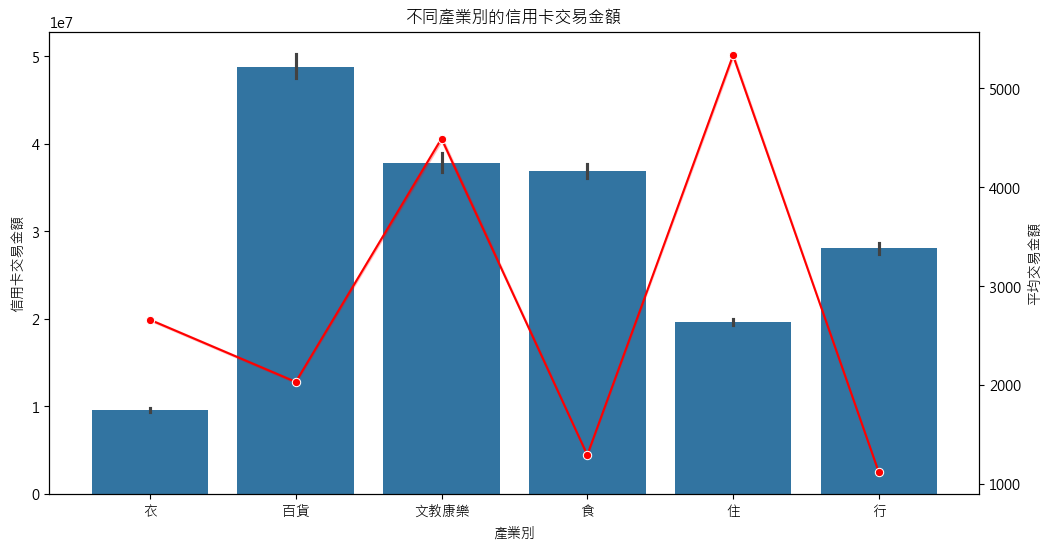

In [31]:
#依產業別分析(排除其他)
df_a['平均交易金額'] = df_a['信用卡交易金額[新台幣]'] / df_a['信用卡交易筆數']
plt.figure(figsize=(12, 6))
sns.barplot(x='產業別', y='信用卡交易金額[新台幣]', data=df_a)
plt.title('不同產業別的信用卡交易金額')
plt.xlabel('產業別')
plt.ylabel('信用卡交易金額')

ax2 = plt.twinx()
sns.lineplot(x='產業別', y='平均交易金額', data=df_a, color='red', marker='o', ax=ax2)
ax2.set_ylabel('平均交易金額')
plt.show()

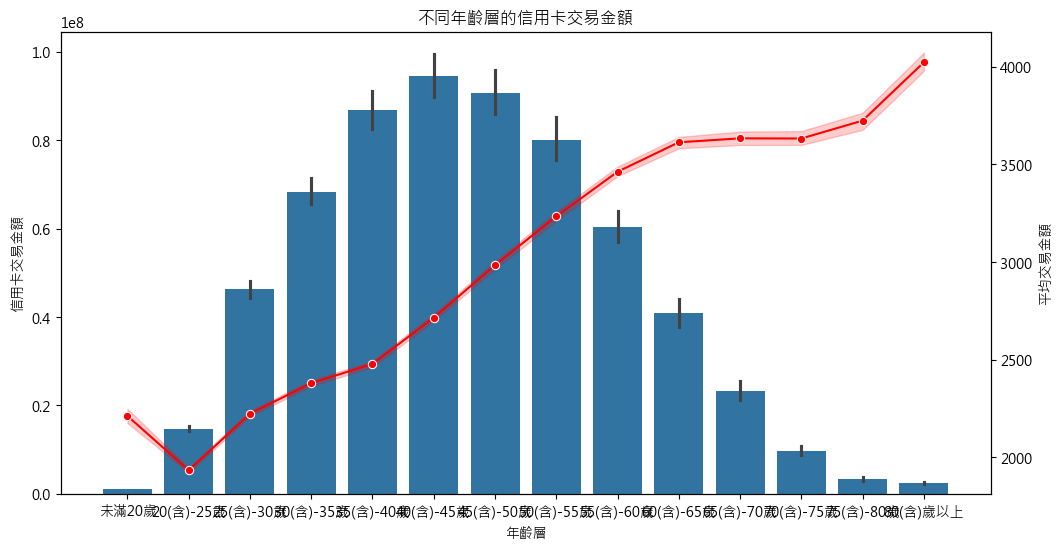

In [18]:
#依年齡層分析
df['平均交易金額'] = df['信用卡交易金額[新台幣]'] / df['信用卡交易筆數']
plt.figure(figsize=(12, 6))
sns.barplot(x='年齡層', y='信用卡交易金額[新台幣]', data=df)
plt.title('不同年齡層的信用卡交易金額')
plt.xlabel('年齡層')
plt.ylabel('信用卡交易金額')
ax2 = plt.twinx()
sns.lineplot(x='年齡層', y='平均交易金額', data=df, color='red', marker='o', ax=ax2)
ax2.set_ylabel('平均交易金額')
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_21064\622509789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['平均交易金額'] = df_a['信用卡交易金額[新台幣]'] / df_a['信用卡交易筆數']


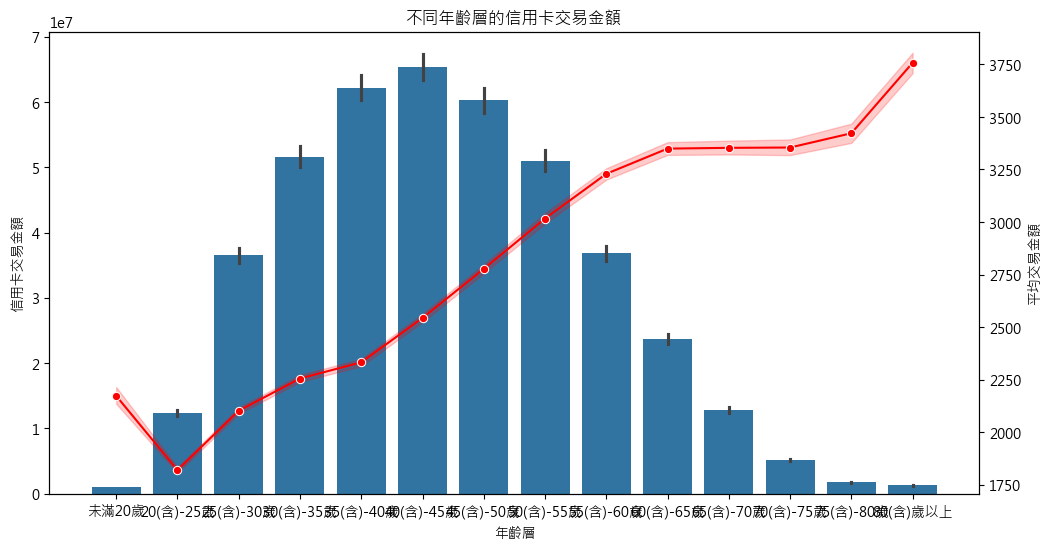

In [33]:
#依年齡層分析(排除其他)
df_a['平均交易金額'] = df_a['信用卡交易金額[新台幣]'] / df_a['信用卡交易筆數']
plt.figure(figsize=(12, 6))
sns.barplot(x='年齡層', y='信用卡交易金額[新台幣]', data=df_a)
plt.title('不同年齡層的信用卡交易金額')
plt.xlabel('年齡層')
plt.ylabel('信用卡交易金額')
ax2 = plt.twinx()
sns.lineplot(x='年齡層', y='平均交易金額', data=df_a, color='red', marker='o', ax=ax2)
ax2.set_ylabel('平均交易金額')
plt.show()


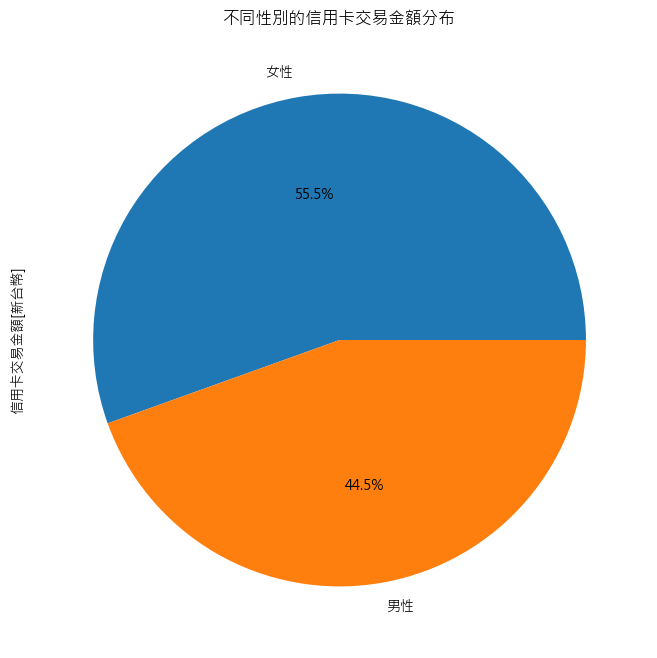

In [19]:
#依性別分析
plt.figure(figsize=(8, 8))
df.groupby('性別')['信用卡交易金額[新台幣]'].sum().plot.pie(autopct='%1.1f%%')
plt.title('不同性別的信用卡交易金額分布')
plt.show()

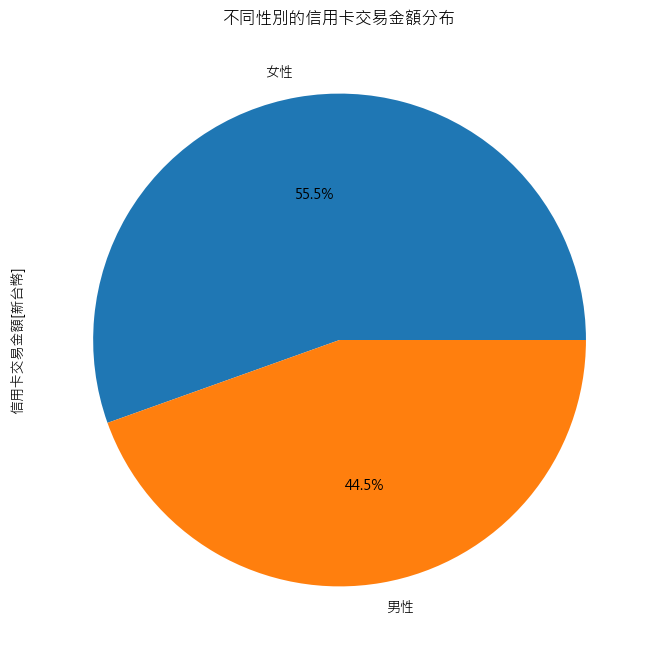

In [34]:
#依性別分析(排附其他)
plt.figure(figsize=(8, 8))
df_a.groupby('性別')['信用卡交易金額[新台幣]'].sum().plot.pie(autopct='%1.1f%%')
plt.title('不同性別的信用卡交易金額分布')
plt.show()

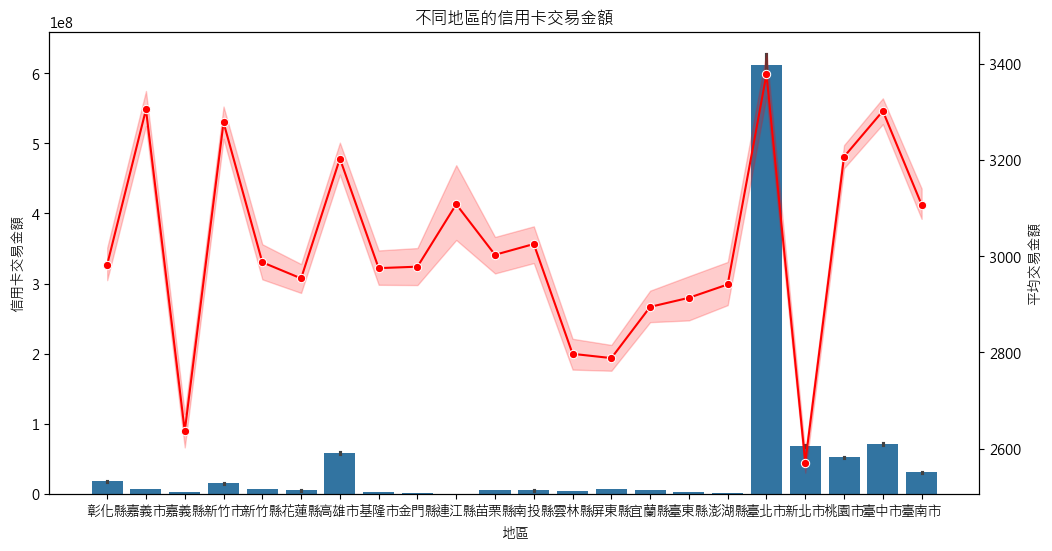

In [20]:
#依區域進行分析
plt.figure(figsize=(12, 6))
sns.barplot(x='地區', y='信用卡交易金額[新台幣]', data=df)
plt.title('不同地區的信用卡交易金額')
plt.xlabel('地區')
plt.ylabel('信用卡交易金額')
ax2 = plt.twinx()
sns.lineplot(x='地區', y='平均交易金額', data=df, color='red', marker='o', ax=ax2)
ax2.set_ylabel('平均交易金額')
plt.show()

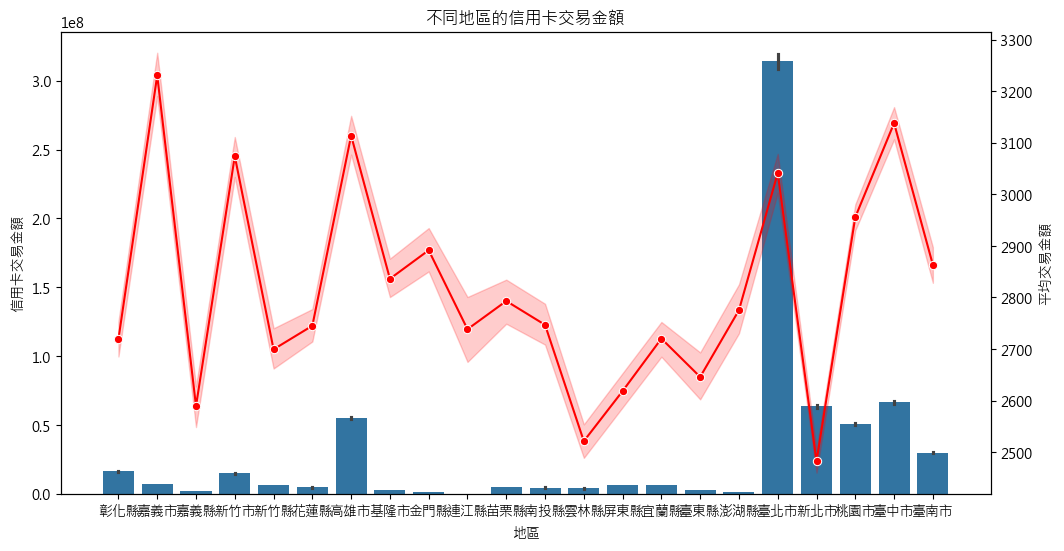

In [35]:
#依區域進行分析(排除其他)
plt.figure(figsize=(12, 6))
sns.barplot(x='地區', y='信用卡交易金額[新台幣]', data=df_a)
plt.title('不同地區的信用卡交易金額')
plt.xlabel('地區')
plt.ylabel('信用卡交易金額')
ax2 = plt.twinx()
sns.lineplot(x='地區', y='平均交易金額', data=df_a, color='red', marker='o', ax=ax2)
ax2.set_ylabel('平均交易金額')
plt.show()

In [53]:
#截取六都資料
df_area6 = pd.read_csv('./six_cities.csv')
x = df_area6['信用卡交易金額[新台幣]'].sum (0)
y = df['信用卡交易金額[新台幣]'].sum(0)
print(f'六都佔總簽帳金額百分比: {x/y:.2%}')
print(df_area6)

六都佔總簽帳金額百分比: 92.29%
           年  月   地區 產業別  性別        年齡層  信用卡交易筆數  信用卡交易金額[新台幣]
0       2014  1  臺北市   食  女性      未滿20歲     2819       2615745
1       2014  1  臺北市   食  女性  20(含)-25歲    66270      66794381
2       2014  1  臺北市   食  女性  25(含)-30歲   227091     263753101
3       2014  1  臺北市   食  女性  30(含)-35歲   396113     490378285
4       2014  1  臺北市   食  女性  35(含)-40歲   498370     618092602
...      ... ..  ...  ..  ..        ...      ...           ...
137587  2023  9  高雄市   行  男性  60(含)-65歲    50439     109126842
137588  2023  9  高雄市   行  男性  65(含)-70歲    31387      57677827
137589  2023  9  高雄市   行  男性  70(含)-75歲    16872      32315853
137590  2023  9  高雄市   行  男性  75(含)-80歲     4559      10076219
137591  2023  9  高雄市   行  男性   80(含)歲以上     1752       3201237

[137592 rows x 8 columns]


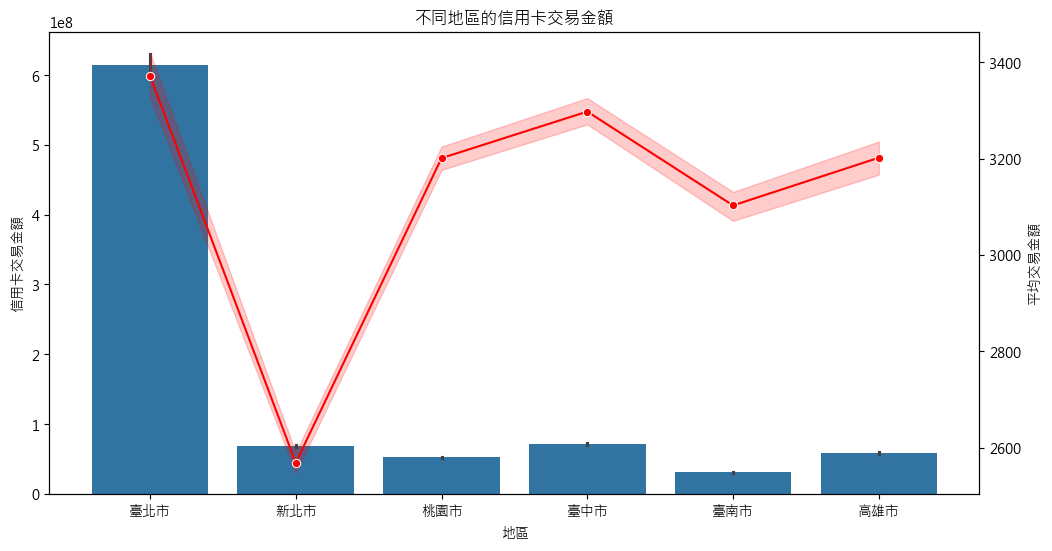

In [26]:
#六都依區域進行分析
plt.figure(figsize=(12, 6))
sns.barplot(x='地區', y='信用卡交易金額[新台幣]', data=df_area6)
plt.title('不同地區的信用卡交易金額')
plt.xlabel('地區')
plt.ylabel('信用卡交易金額')
ax2 = plt.twinx()
sns.lineplot(x='地區', y='平均交易金額', data=df_area6, color='red', marker='o', ax=ax2)
ax2.set_ylabel('平均交易金額')
plt.show()

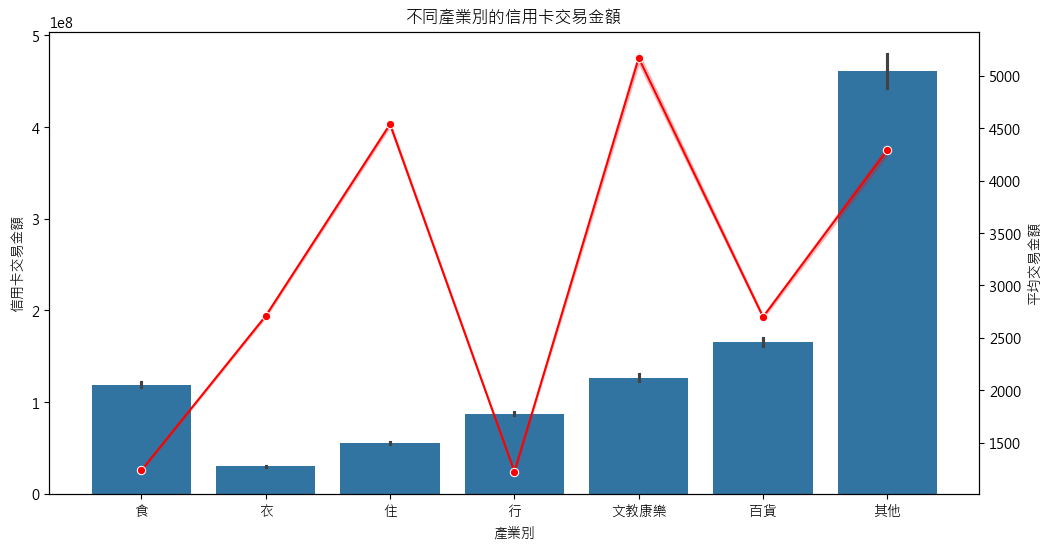

In [23]:
#六都依產業別分析
df_area6['平均交易金額'] = df_area6['信用卡交易金額[新台幣]'] / df_area6['信用卡交易筆數']
plt.figure(figsize=(12, 6))
sns.barplot(x='產業別', y='信用卡交易金額[新台幣]', data=df_area6)
plt.title('不同產業別的信用卡交易金額')
plt.xlabel('產業別')
plt.ylabel('信用卡交易金額')

ax2 = plt.twinx()
sns.lineplot(x='產業別', y='平均交易金額', data=df_area6, color='red', marker='o', ax=ax2)
ax2.set_ylabel('平均交易金額')
plt.show()

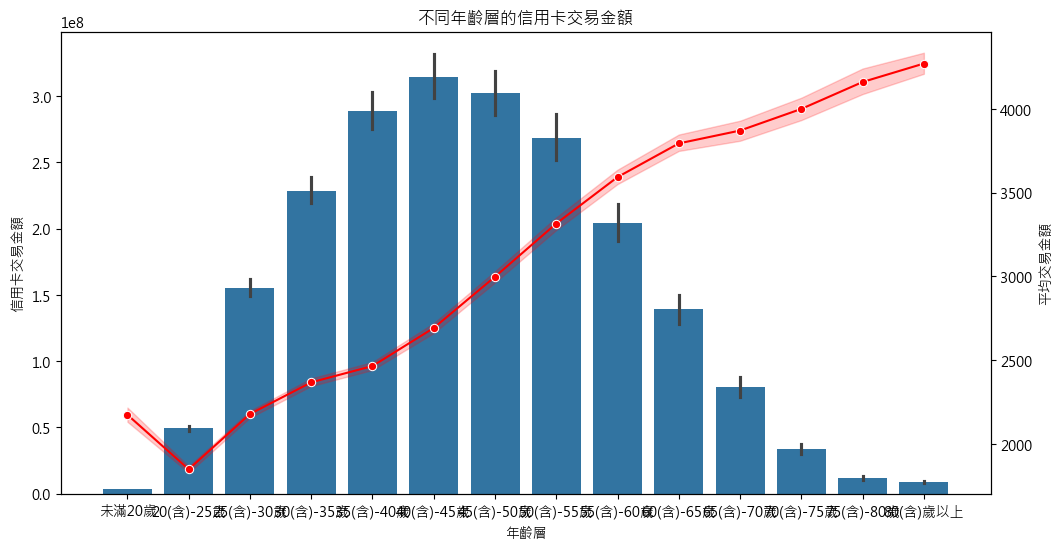

In [24]:
#六都依年齡層分析
df_area6['平均交易金額'] = df_area6['信用卡交易金額[新台幣]'] / df_area6['信用卡交易筆數']
plt.figure(figsize=(12, 6))
sns.barplot(x='年齡層', y='信用卡交易金額[新台幣]', data=df_area6)
plt.title('不同年齡層的信用卡交易金額')
plt.xlabel('年齡層')
plt.ylabel('信用卡交易金額')
ax2 = plt.twinx()
sns.lineplot(x='年齡層', y='平均交易金額', data=df_area6, color='red', marker='o', ax=ax2)
ax2.set_ylabel('平均交易金額')
plt.show()


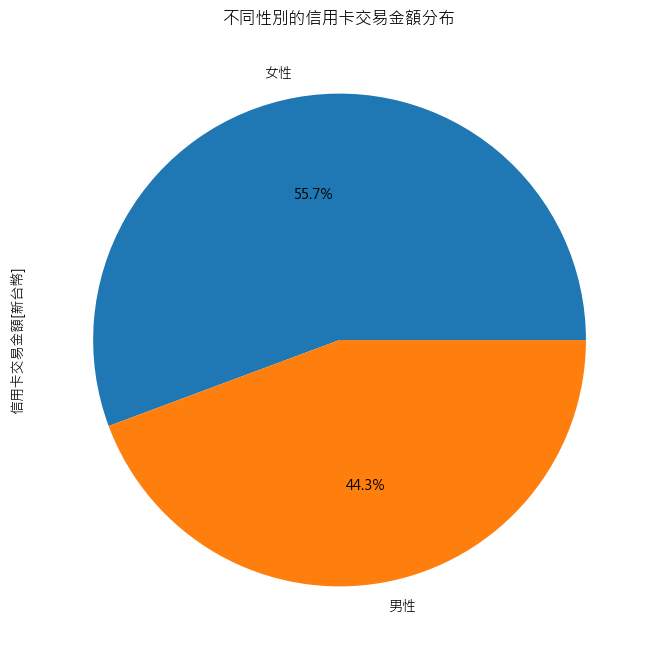

In [25]:
#六都依性別分析
plt.figure(figsize=(8, 8))
df_area6.groupby('性別')['信用卡交易金額[新台幣]'].sum().plot.pie(autopct='%1.1f%%')
plt.title('不同性別的信用卡交易金額分布')
plt.show()

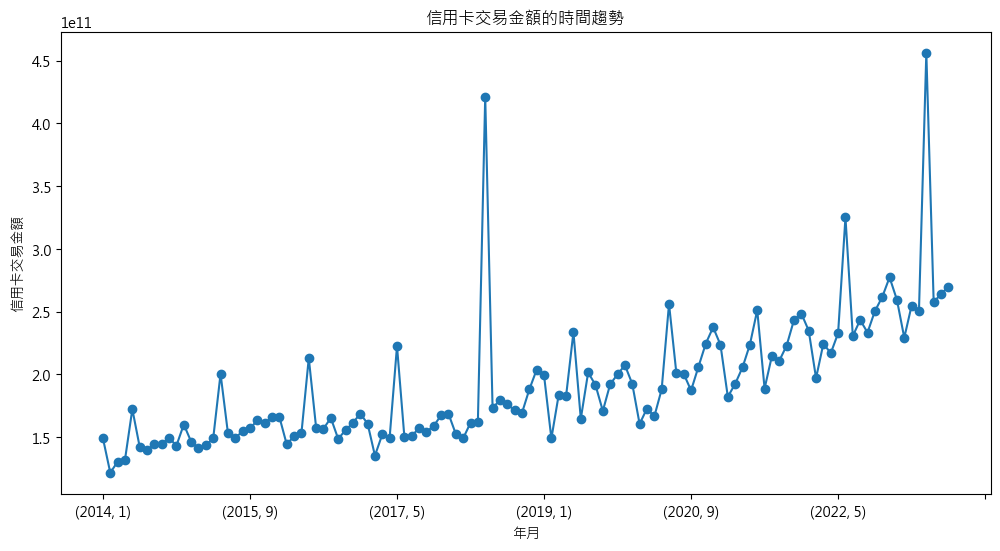

In [ ]:
plt.figure(figsize=(12, 6))
df.groupby(['年', '月'])['信用卡交易金額[新台幣]'].sum().plot(marker='o')
plt.title('信用卡交易金額的時間趨勢')
plt.xlabel('年月')
plt.ylabel('信用卡交易金額')
plt.show()

C:\Users\isabe\AppData\Local\Temp\ipykernel_17472\2135203272.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='產業別', y='信用卡交易金額[新台幣]', hue='產業別', data=grouped_data, ci=None)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


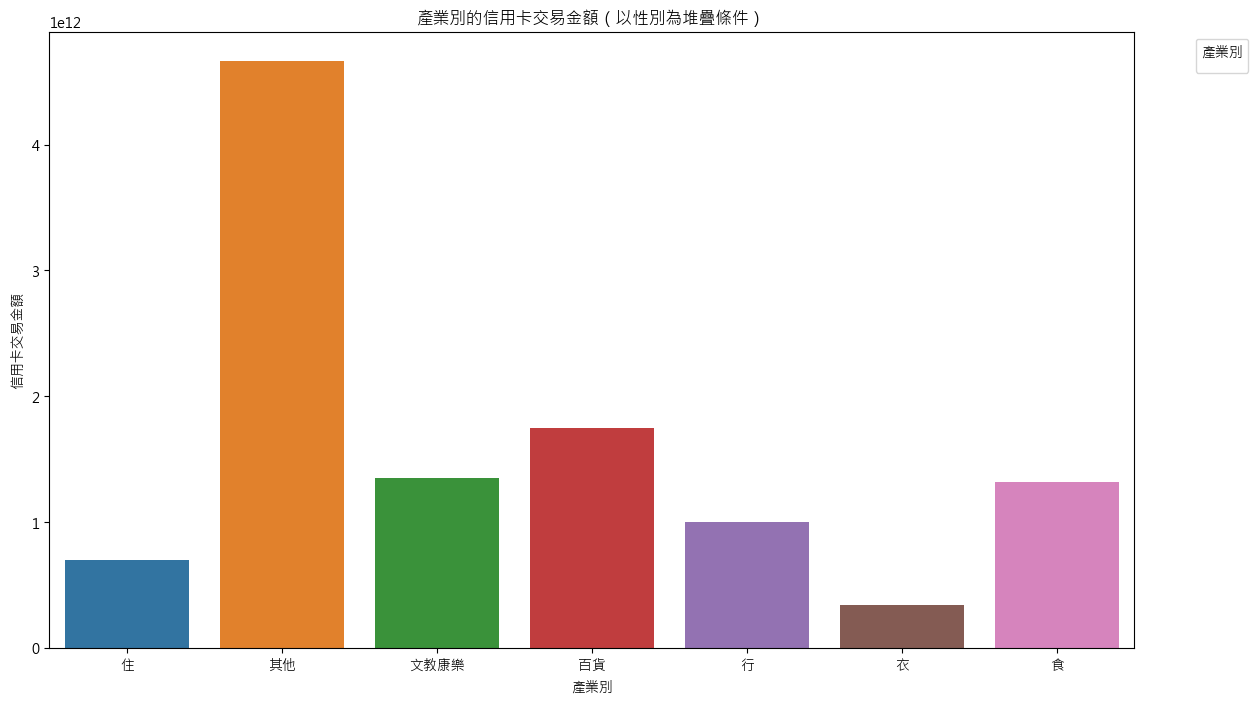

In [ ]:
grouped_data = df.groupby(['性別', '產業別'])['信用卡交易金額[新台幣]'].sum().reset_index()

# 繪製堆疊圖
plt.figure(figsize=(14, 8))
sns.barplot(x='產業別', y='信用卡交易金額[新台幣]', hue='產業別', data=grouped_data, ci=None)
plt.title('產業別的信用卡交易金額（以性別為堆疊條件）')
plt.xlabel('產業別')
plt.ylabel('信用卡交易金額')
plt.legend(title='產業別', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\isabe\AppData\Local\Temp\ipykernel_17472\4066691068.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='產業別', y='信用卡交易金額[新台幣]', hue='性別', data=grouped_data, ci=None)


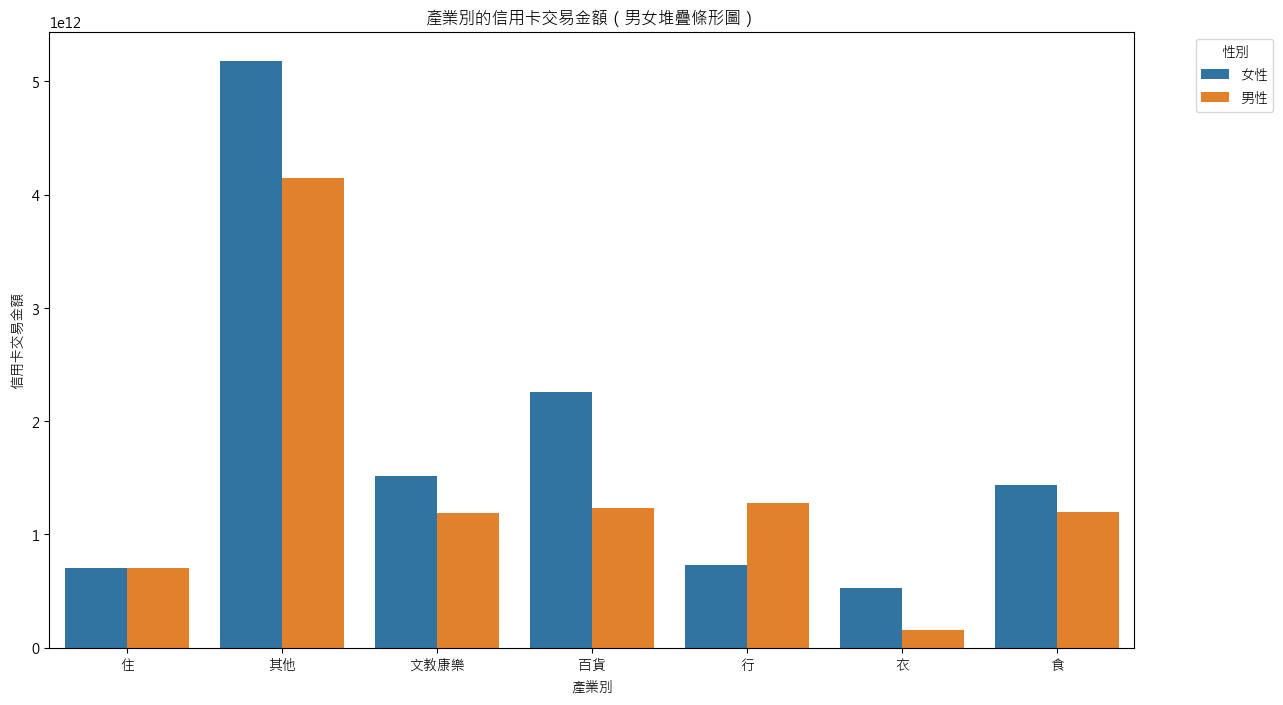

In [ ]:

grouped_data = df.groupby(['性別', '產業別'])['信用卡交易金額[新台幣]'].sum().reset_index()

# 使用堆疊圖，x='產業別'，y='信用卡交易金額[新台幣]'，hue='性別'
plt.figure(figsize=(14, 8))
sns.barplot(x='產業別', y='信用卡交易金額[新台幣]', hue='性別', data=grouped_data, ci=None)
plt.title('產業別的信用卡交易金額')
plt.xlabel('產業別')
plt.ylabel('信用卡交易金額')
plt.legend(title='性別', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\isabe\AppData\Local\Temp\ipykernel_17472\2675403776.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='產業別', y='信用卡交易金額[新台幣]', hue='性別', data=grouped_data, ci=None, palette={'男性': 'blue', '女性': 'orange'})


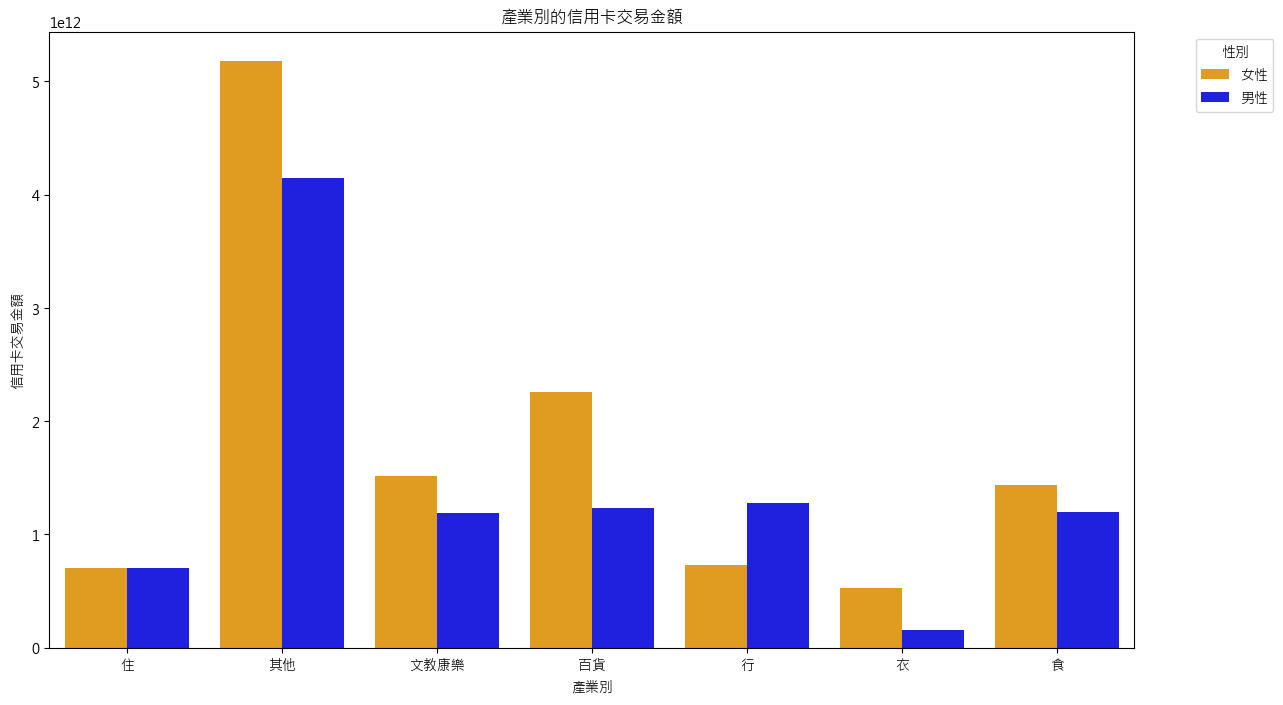

In [ ]:
grouped_data = df.groupby(['性別', '產業別'])['信用卡交易金額[新台幣]'].sum().reset_index()

# 繪製堆疊圖，使用不同顏色區分男女
plt.figure(figsize=(14, 8))
sns.barplot(x='產業別', y='信用卡交易金額[新台幣]', hue='性別', data=grouped_data, ci=None, palette={'男性': 'blue', '女性': 'orange'})
plt.title('產業別的信用卡交易金額')
plt.xlabel('產業別')
plt.ylabel('信用卡交易金額')
plt.legend(title='性別', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\isabe\AppData\Local\Temp\ipykernel_17472\3913188557.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='地區', y='信用卡交易金額[新台幣]', hue='產業別', data=filtered_data, ci=None)


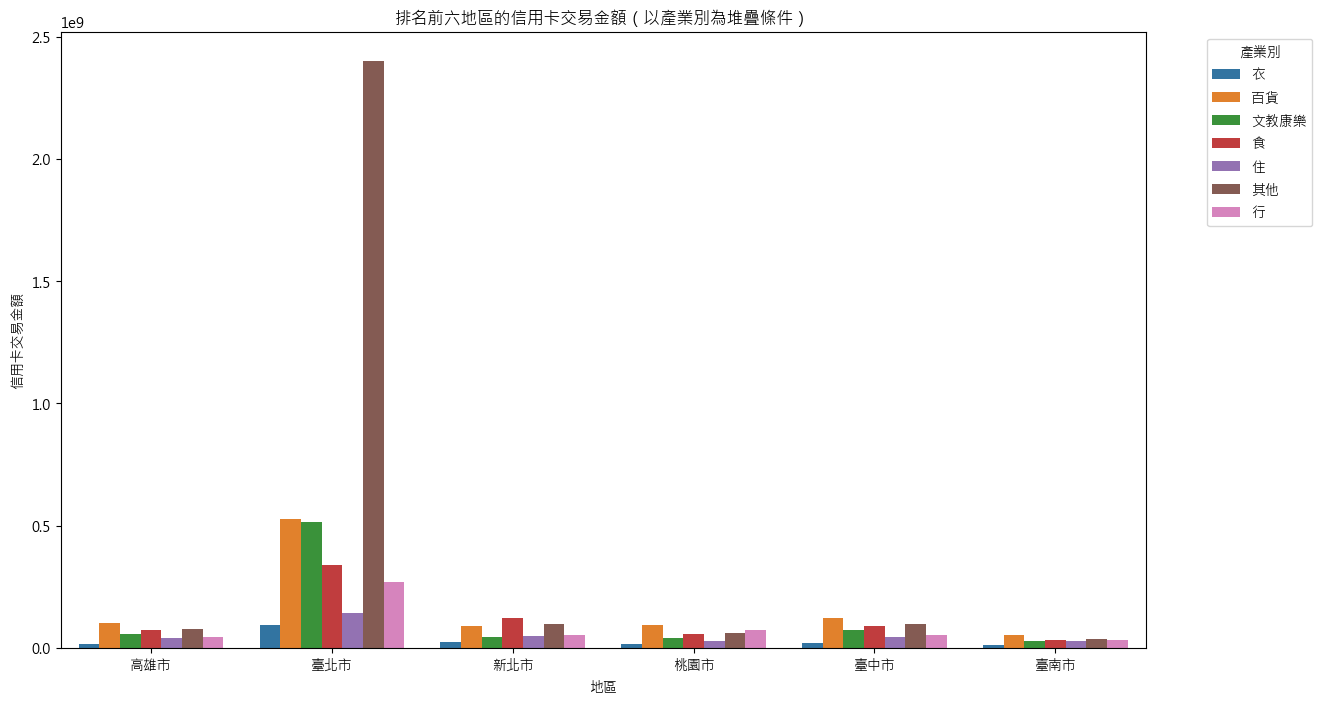

In [ ]:
region_total = df.groupby('地區')['信用卡交易金額[新台幣]'].sum().reset_index()

# 選擇排名前六的地區
top_regions = region_total.nlargest(6, '信用卡交易金額[新台幣]')['地區']

# 過濾原始資料，只保留排名前六的地區的資料
filtered_data = df[df['地區'].isin(top_regions)]

# 繪製堆疊圖，x='地區'，y='信用卡交易金額[新台幣]'，hue='產業別'，以性別堆疊
plt.figure(figsize=(14, 8))
sns.barplot(x='地區', y='信用卡交易金額[新台幣]', hue='產業別', data=filtered_data, ci=None)
plt.title('排名前六地區的信用卡交易金額（以產業別為堆疊條件）')
plt.xlabel('地區')
plt.ylabel('信用卡交易金額')
plt.legend(title='產業別', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
grouped_data = df.groupby(['性別', '地區', '產業別'])['信用卡交易金額[新台幣]'].sum().reset_index()

# 繪製堆疊圖
plt.figure(figsize=(14, 8))
sns.barplot(x='地區', y='信用卡交易金額[新台幣]', hue='產業別', data=grouped_data, ci=None)
plt.title('不同地區、產業別的信用卡交易金額（以性別為堆疊條件）')
plt.xlabel('地區')
plt.ylabel('信用卡交易金額')
plt.legend(title='產業別', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

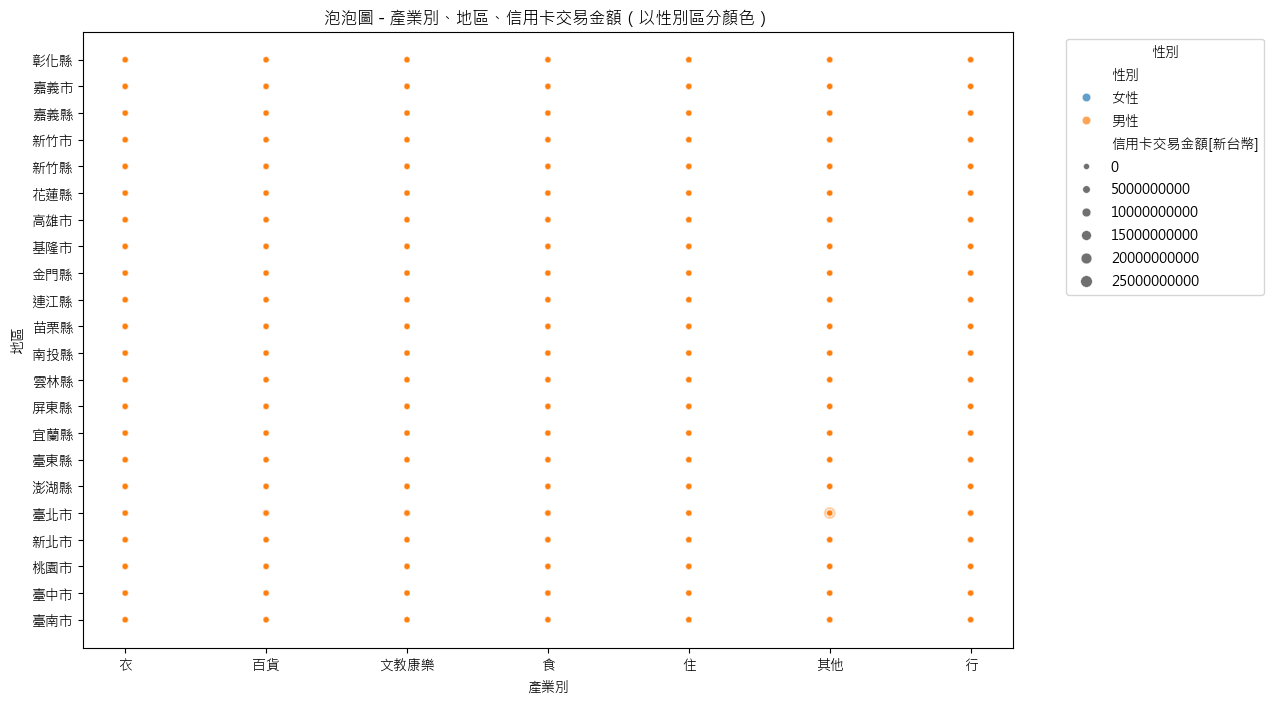

In [ ]:
plt.rcParams['font.family'] = 'Microsoft JhengHei'
selected_columns = ['產業別', '地區', '信用卡交易金額[新台幣]', '性別']
selected_data = df[selected_columns]
plt.figure(figsize=(12, 8))
sns.scatterplot(x='產業別', y='地區', size='信用卡交易金額[新台幣]', hue='性別', data=selected_data, alpha=0.7)
plt.title('泡泡圖 - 產業別、地區、信用卡交易金額（以性別區分顏色）')
plt.xlabel('產業別')
plt.ylabel('地區')
plt.legend(title='性別', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

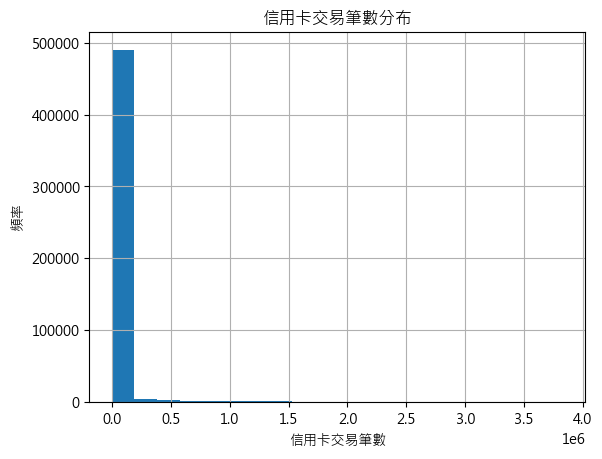

In [ ]:
df['信用卡交易筆數'].hist(bins=20)
plt.title('信用卡交易筆數分布')
plt.xlabel('信用卡交易筆數')
plt.ylabel('頻率')
plt.show()

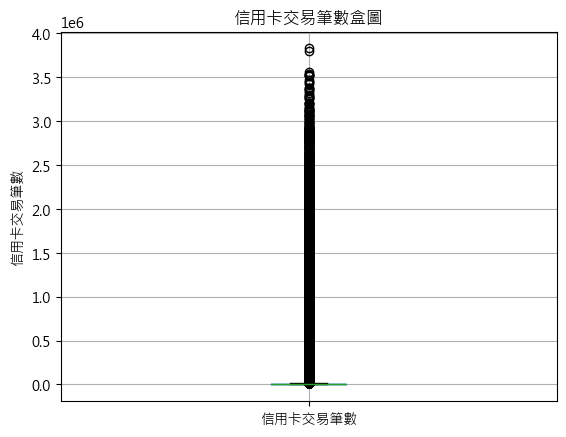

In [ ]:
df.boxplot(column='信用卡交易筆數')
plt.title('信用卡交易筆數盒圖')
plt.ylabel('信用卡交易筆數')
plt.show()